# Lab O5 Image Classification with CIFAR-10 with SVM
The objective of this lab is to explore image classification and implement the Support Vector Machine algorithm for such a task using scikit-learn. 
## A. Data Exploration & Preparation
#### 1. First, I will load the necessary libraries. 

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

#### 2. Load the CIFAR-10 dataset.
Next, I will load the CIFAR-10 dataset. 

In [15]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Reshape labels to 1D for compatibility
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()


#### 3. Visualize some images from the dataset
Then, I will create an variable with the 10 classes in the dataset. This will allow me to create visualizations and plot images. 

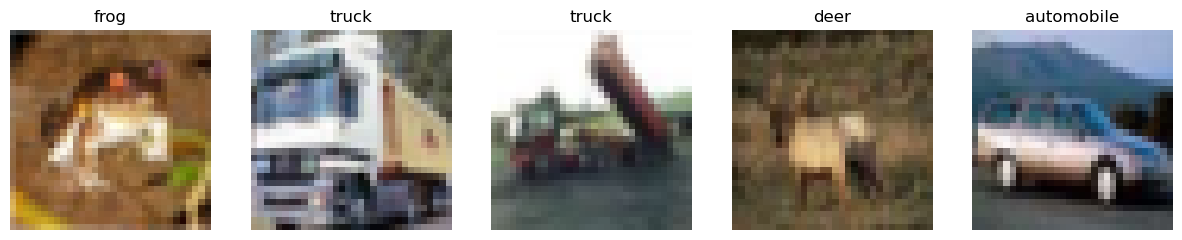

In [17]:
def visualize_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()
visualize_images(train_images, train_labels, class_names, num_images=5)

#### 4. Convert the images to grayscale and flatten them. 

In [19]:
# Grey scale conversion
train_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in train_images])
test_images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in test_images])

# Flatten the images 
train_images_flattened = train_images_gray.reshape(train_images_gray.shape[0], -1).astype('float32') / 255
test_images_flattened = test_images_gray.reshape(test_images_gray.shape[0], -1).astype('float32') / 255

# Normalize the data
scaler = StandardScaler()
train_images_flattened = scaler.fit_transform(train_images_flattened)
test_images_flattened = scaler.transform(test_images_flattened)

#### 5. Split the dataset into training and testing data. 
This is a fundamential function in the machine learning process to seperate the data. The training set does just that, and the testing set is used to evaluate model performance after training. Also, this helps to prevent overfitting and to assist in hyperparameter tuning. This will help evaluation the model fairly.

In [21]:
train_images_flattened, test_images_flattened, train_labels, test_labels = train_test_split(train_images_flattened,train_labels, test_size=0.2, random_state=42)
print("Training features:", train_images_flattened.shape)
print("Testing features:", test_images_flattened.shape)
print("Training labels:", train_labels.shape)
print("Testing labels:", test_labels.shape)

Training features: (40000, 1024)
Testing features: (10000, 1024)
Training labels: (40000,)
Testing labels: (10000,)


# B. Model Training
#### 1. Understand the concept of Support Vector Machines (SVM) and why use a SVM?

SVM is a supervised machine learning algorithm used for classification and regression. It is particularly well suited for classification activies. The ideal hyperplane in an N-dimensional space is found and used to seperate data points into different classes. SVM is used for its ability to efficiently classify data. It works well with both linear and non-linear data by finding the optimal hyperplane that maximizes the margin between classes, making it highly effective for classification tasks with complex datasets.

In A 2-D space, a SVM  tries to fine a line and divides the data into two classes in the best way. The closest points to the hyperplane are called support vectors. The distance between the hyperplane and the support vectors is known as the margin. The idea is to maximize the margin between the closest data points of each class. 

Non-linear SVM ues the kernel trick when the data cannot be sepeated by a line, such as in a 3-D space or higher. The idea is to map the data into a higher dimensional space. Popular kernel functions include the Polynomial Kernel, Radial Basis Function Kernel, and the Sigmoid Kernel. 

It's important to cotrol the regularization paramater C and not overfit the model while at the same time limiting margin errors. The specific kernel affects how the data is mapped into higher dimensions. 

#### 2. Train an SVM classifier using the training set. 

In [74]:
# Using a RBF kernel
svm_classifier = svm.SVC(kernel='rbf', C=10, gamma='scale')

# Using a smaller subset of the data due to a memory error
train_images_subset = train_images_flattened[:45000]
train_labels_subset = train_labels[:45000].ravel()

# Train the SVM model. First I will fit the model on my training. 
svm_classifier.fit(train_images_subset, train_labels_subset)


SVC(C=10)

## C. Model Evaluation
#### 1. Make predictions on the testing set. 

In [76]:
labels_pred = svm_classifier.predict(test_images_flattened)

#### 2. Evaluate the model's performance using accuracy. 

In [78]:
accuracy = accuracy_score(test_labels, labels_pred)
print(f"Accuracy: {accuracy: .4f}")
print("Classificstion Report \n", classification_report(test_labels, labels_pred))

Accuracy:  0.4693
Classificstion Report 
               precision    recall  f1-score   support

           0       0.47      0.50      0.48       973
           1       0.53      0.60      0.56       979
           2       0.36      0.39      0.37      1030
           3       0.35      0.33      0.34      1023
           4       0.37      0.42      0.39       933
           5       0.42      0.37      0.39      1015
           6       0.51      0.48      0.49       996
           7       0.58      0.52      0.55       994
           8       0.57      0.55      0.56      1017
           9       0.56      0.54      0.55      1040

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



#### 3. Visualize some predictions along with their true labels. 

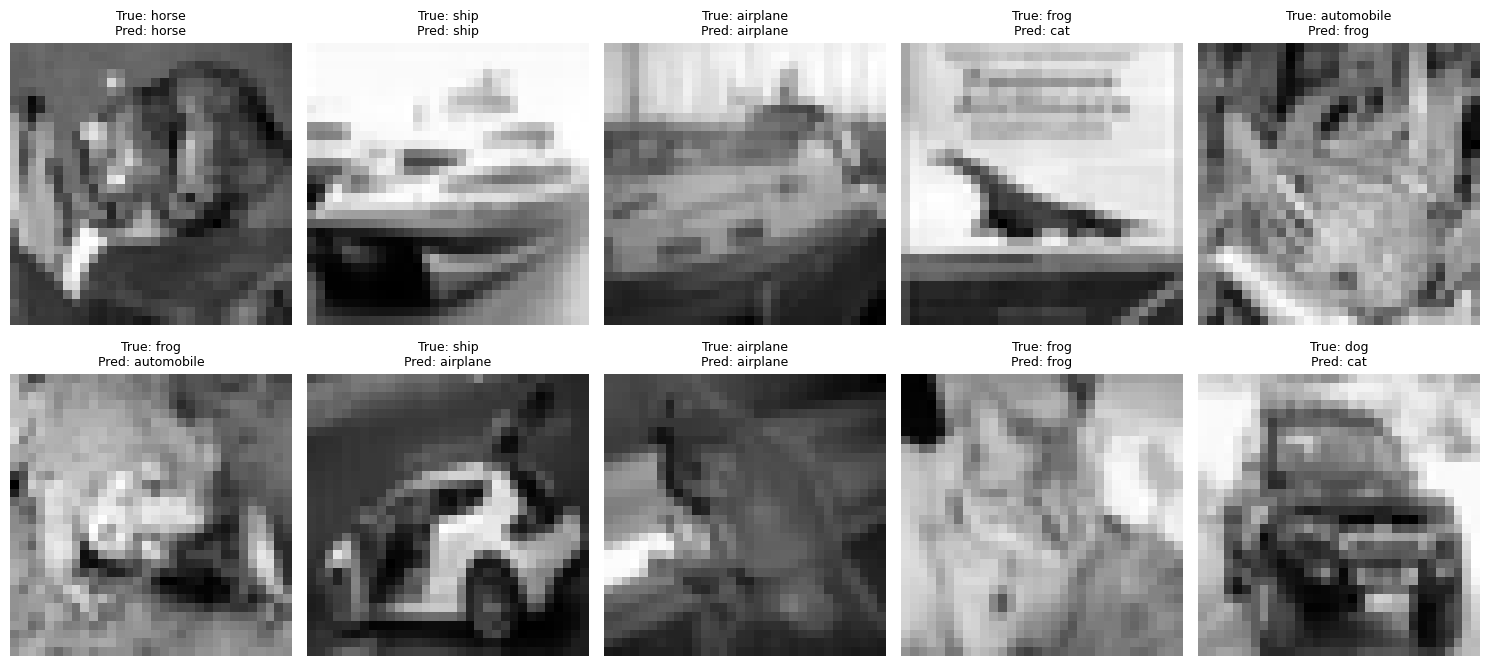

In [80]:
num_images = 10
plt.figure(figsize=(15, 7))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images_gray[i], cmap='gray')
    true_label = class_names[test_labels[i]]
    pred_label = class_names[labels_pred[i]]  
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 4. Reflective Journal 
When I began working on the Support Vector Machine (SVM) for image classification, I encountered several challenges that made the process more complicated than I initially anticipated.

One of the first obstacles I faced was with the data shapes. My training and testing data did not align properly, which caused confusion and errors in model training. The mismatch in dimensions meant that I had to carefully adjust the data preprocessing steps. Ensuring that the features and labels aligned properly took a bit of time and required some reshaping and standardization of the input.

Another significant hurdle came when I first evaluated the accuracy of my SVM. To my surprise, the initial accuracy was only about 0.10 (10%). This was incredibly discouraging, especially after putting in the effort to train and tune the model. I realized that this poor performance could be attributed to several factors, including insufficient parameter tuning, lack of kernel optimization, and potentially the scale of the features. At that point, I had to revisit the model's configuration, trying different kernel functions, scaling techniques, and even adjusting hyperparameters. Improving the accuracy became a matter of refining the model through experimentation.

The third challenge I faced was related to visualizing the predictions. At first, I struggled to display the images and their associated predicted labels in a meaningful way. The labels and predictions were difficult to interpret when printed directly, and I couldn't get a clear view of how well the model was performing visually. After some trial and error, I was able to plot a grid of images, compare their true and predicted labels, and get a better understanding of where the model was succeeding and where it was failing.

In the end, these challenges helped me learn the importance of data preprocessing, model evaluation, and visualizing results in computer vision. Despite the initial setbacks, each challenge taught me valuable lessons on problem-solving and the iterative nature of building machine learning models.


#### Work Cited
“1.4. Support Vector Machines.” Scikit, scikit-learn.org/stable/modules/svm.html. Accessed 11 Mar. 2025. 

Chatgpt, chatgpt.com/. Accessed 12 Mar. 2025. 

Comment, et al. “Support Vector Machine (SVM) Algorithm.” GeeksforGeeks, 27 Jan. 2025, www.geeksforgeeks.org/support-vector-machine-algorithm/. 